In [51]:
from numpy.distutils.system_info import dfftw_info
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics as skm

import os

os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\'
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML

style = "<style>svg{width:100% !important;height:100% !important;}</style>"
HTML(style)

In [52]:
dfiris = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv',index_col=0)
dfiris_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv',index_col=0)

In [53]:
dfiris_test

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0
125,7.2,3.2,6.0,1.8,2
36,5.5,3.5,1.3,0.2,0
141,6.9,3.1,5.1,2.3,2
12,4.8,3.0,1.4,0.1,0
63,6.1,2.9,4.7,1.4,1


In [54]:
dfiris.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [55]:
X = dfiris.drop(['species'],axis=1)
y = dfiris.species

X_test = dfiris_test.drop(['species'],axis=1)
y_test = dfiris_test.species

In [56]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
np.random.seed(0)

In [64]:
scores_data = pd.DataFrame()
max_depth_range = range(1,100)
for max_depth in max_depth_range:
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    clf.fit(X,y)
    train_score = clf.score(X, y)
    test_score = clf.score(X_test,y_test)
    # test_accuracy_score = accuracy_score(dfiris_test.drop(['species'],axis=1),
    #                                      dfiris_test.species)

    mean_cross_val_score = cross_val_score(clf,X,y, cv=5).mean()

    skm_accurancy = skm.accuracy_score(clf.predict(X_test), y_test)

    temp_score_date = pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [train_score],
        'test_score': [test_score],
        'skm_accurancy': [skm_accurancy],
        'cross_val_score':mean_cross_val_score,
        # 'test_accuracy_score': test_accuracy_score
    })
    #scores_data = scores_data.append(temp_score_date)
    scores_data = pd.concat([scores_data, temp_score_date])

In [65]:
scores_data_long = pd.melt(scores_data,
                           id_vars=['max_depth'],
                           value_vars=['train_score','test_score',
                                       'skm_accurancy',
                                       'cross_val_score'
                                       ],
                           var_name='set_type',
                           value_name='score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

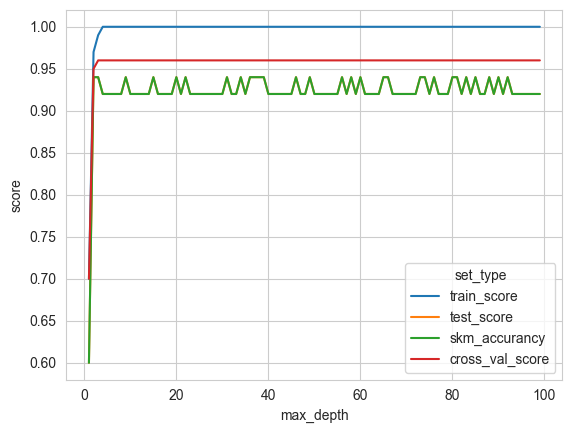

In [66]:
sns.lineplot(x='max_depth',
             y='score',
             hue='set_type',
             data=scores_data_long)